# 1️⃣ Retrieving & Structuring AML Fines Data(Task 1.1)


In [10]:

# Python (Pandas) can be used to load and clean AML fines data.

import pandas as pd  

# Load AML fines dataset  
df = pd.read_excel(r"C:\Users\Acer\anaconda3\Python install\AML_Fines_2023.xlsx")  

# Display first few rows to verify data  
print(df.head())  

# ✔ Automates data collection and preparation
# ✔ Handles large datasets efficiently

     Institution      Country  Total Fines (USD Billion)  \
0    Danske Bank      Denmark                        2.0   
1        Binance       Global                        4.3   
2        TD Bank       Canada                        3.0   
3  Credit Suisse  Switzerland                        1.3   
4    Wells Fargo          USA                        1.0   

                                  Reason Industry  
0                  Weak KYC & Monitoring  Banking  
1                 AML Breaches in Crypto  Fintech  
2                     Poor Due Diligence  Banking  
3                   Corrupt Transactions  Banking  
4  Failure to Report Suspicious Activity  Banking  


# 2️⃣ Conducting Sector Analysis of AML Fines(Task 1.2)

In [11]:

# categorize fines by industry and visualize the impact.

df_sector = df.groupby("Industry")["Total Fines (USD Billion)"].sum().reset_index()
print(df_sector)


  Industry  Total Fines (USD Billion)
0  Banking                        7.3
1  Fintech                        4.3


# 🔹 Visualization: Compare fines across industries

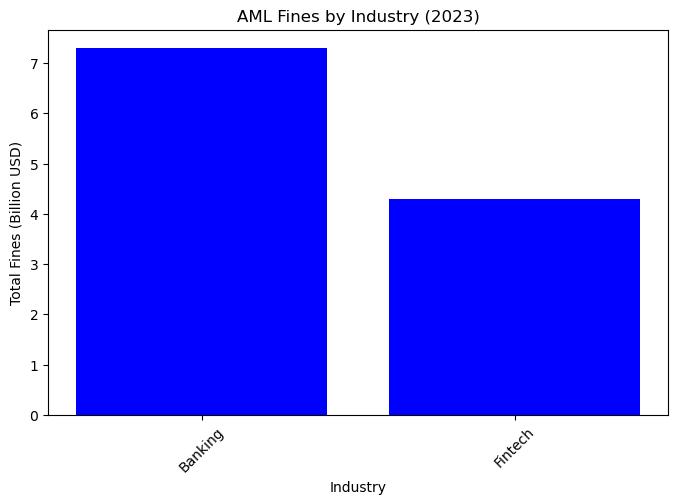

In [12]:


import matplotlib.pyplot as plt

# Bar Chart: AML Fines by Industry
plt.figure(figsize=(8, 5))
plt.bar(df_sector["Industry"], df_sector["Total Fines (USD Billion)"], color="blue")
plt.xlabel("Industry")
plt.ylabel("Total Fines (Billion USD)")
plt.title("AML Fines by Industry (2023)")
plt.xticks(rotation=45)
plt.show()


# ✔ Quickly aggregates country-wise fines
# ✔ Provides insights into regional AML enforcement

# 3️⃣ Analyzing AML Fines by Country & Region(Task 1.3)

In [17]:
# Grouping AML fines by country and region using Python.

df_region = df.groupby("Country")["Total Fines (USD Billion)"].sum().reset_index()
df_region_sorted = df_region.sort_values(by="Total Fines (USD Billion)", ascending=False)
print(df_region_sorted.head(10))  # Top 10 fined countries


       Country  Total Fines (USD Billion)
2       Global                        4.3
0       Canada                        3.0
1      Denmark                        2.0
3  Switzerland                        1.3
4          USA                        1.0


# 🔹 Visualization: AML fines by region

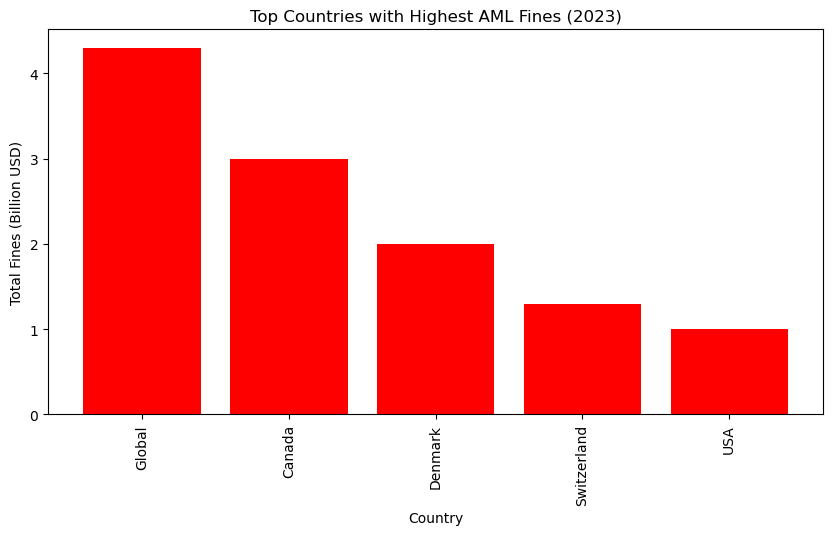

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(df_region_sorted["Country"], df_region_sorted["Total Fines (USD Billion)"], color="red")
plt.xlabel("Country")
plt.ylabel("Total Fines (Billion USD)")
plt.title("Top Countries with Highest AML Fines (2023)")
plt.xticks(rotation=90)
plt.show()

# ✔ Quickly aggregates country-wise fines
# ✔ Provides insights into regional AML enforcement

# 4️⃣ Basel AML Index & FATF List Analysis (Task 2)


In [8]:
# Compare Basel AML Index scores with FATF Grey/Black Lists.

df_basel = pd.read_excel(r"C:\Users\Acer\anaconda3\Python install\Basel_AML_Index_2023.xlsx")
df_fatf = pd.read_excel(r"C:\Users\Acer\anaconda3\Python install\FATF_List_2023.xlsx")

# Merge Basel Index & FATF data
df_combined = df_basel.merge(df_fatf, on="Country", how="left")
print(df_combined.head())


                            Country  ML/TF Risk Score    Region FATF_Status
0                             Haiti              8.25  Americas         NaN
1                              Chad              8.14    Africa         NaN
2                           Myanmar              8.13      Asia  Black List
3  Democratic Republic of the Congo              8.10    Africa         NaN
4                        Mozambique              7.88    Africa   Grey List


# 🔹 Visualization: High-risk countries from both lists

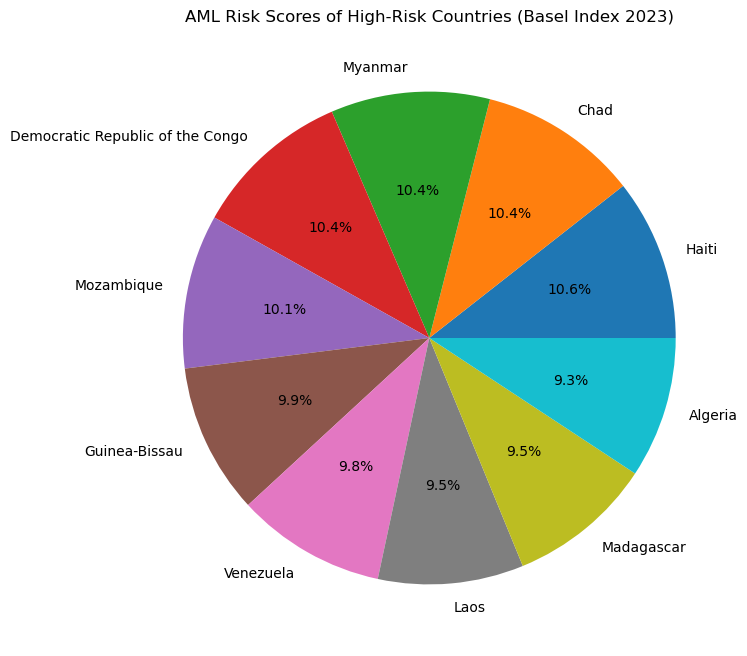

In [9]:

plt.figure(figsize=(8, 8))
plt.pie(df_basel["ML/TF Risk Score"], labels=df_basel["Country"], autopct='%1.1f%%')
plt.title("AML Risk Scores of High-Risk Countries (Basel Index 2023)")
plt.show()
